# Labo 3 Data Science : Numerical Python (numpy)

### 1. Matrices als geneste lijsten

Een matrix zou je in Python kunnen voorstellen als een geneste lijst. 
Je kan op een eenvoudige manier elementen accesereren (via de indices, slicing), elementen wijzigen, deleten enz..

In [ ]:
T = [[11, 12, 5, 2], [15, 6, 10, 15], [10, 8, 12, 5], [12,15,8,6]]
print(T[0])
print(T[1][2])

for r in T:
    for c in r:
        print(c,end = " ")
    print()
    
print('\ninserting:' + str([0,5,11,13,6]))
#rij toevoegen
T.insert(2, [0,5,11,13,6])

for r in T:
    for c in r:
        print(c,end = " ")
    print()

print('\nupdating:')
# wijzig de tweede rij naar [11,9,7]
T[2] = [11,9,7]
# het element op positie(0,3) naar 100
T[0][3]=100

for r in T:
    for c in r:
        print(c,end = " ")
    print()

print('\ndeleting')
#verwijder de derde rij
del T[2]
#verwijder het element op postie(0,0)
del T[0][0]
for r in T:
    for c in r:
        print(c,end = " ")
    print()



__Oefening 1__ : Schrijf een Python-functie die een dambordmatrix van dimensie n genereert. Voorbeeld: dambordmatrix van dimensie 3:
\begin{equation*}
\begin{bmatrix}
0 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 0
\end{bmatrix}
\end{equation*}
Elke rij en elke kolom is een alternering van $0$ en$1$. Het is niet toegelaten om numpy te gebruiken !! 

_Tip:_  [1,2]*2 geeft [1,2,1,2].
De python-matrix kan je rechtstreeks visualiseren met __[matplotlib's pcolor](https://matplotlib.org/gallery/images_contours_and_fields/pcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-pcolor-demo-py)__ 

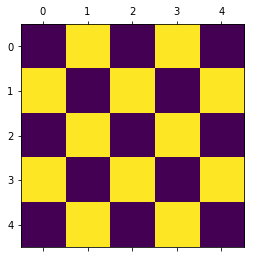

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import time

def dam(n):
    final = []
    val = False
    for x in range(n):
        tmp = []
        for y in range(n):
            tmp.append(int(val))
            val = not val
        final.append(tmp)
    return final

plt.matshow(dam(5))
plt.show()
#plt.pcolor(dam(7))


### 2. Matrices in numpy

__Oefening 2__ :
Deze oefening vormt een opwarmer op NumPy. De __[Quickstart van NumPy](https://docs.scipy.org/doc/numpy/user/quickstart.html#quickstart-shape-manipulation)__ geeft voldoende info voor deze oefening.
* Definieer een klassieke Python-lijst met de gehele getallen van 0 t.e.m. 24.
* Zet deze lijst om naar een NumPy-array
* Herschik de elementen zodat het een 5x5 matrix wordt
* Print van deze matrix: het aantal dimensies, de dimensies (= shape) zelf en het datatype van de elementen
* Vermenigvuldig alle elementen met 2
* Gebruik slicing om
   * de __laatste__ rij weer te geven
   * van de eerste 2 rijen de __laatste__ 2 kolommen weer te geven
   * alle __even__ rijen en kolommen weer te geven
* Toon de booleaanse matrix die aangeeft of de elementen deelbaar zijn door 7
* Gebruik deze booleaanse matrix om deze elementen op 0 te zetten


In [48]:
import numpy as np

lijst = range(25)
print(lijst)
lijst = np.array(lijst)
print(lijst)
lijst = lijst.reshape(5,5)
print(lijst)
print(lijst.ndim)
print(lijst.shape)
print(lijst.dtype)

lijst = lijst * 2
print(lijst)
print("\n")
print(lijst[-1:])
print("\n")
print(lijst[:2,-2:])
print("\n")
print(lijst[1::2,1::2])
print("\n")
temp = lijst % 7 == 0
print(temp*lijst)



range(0, 25)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
2
(5, 5)
int32
[[ 0  2  4  6  8]
 [10 12 14 16 18]
 [20 22 24 26 28]
 [30 32 34 36 38]
 [40 42 44 46 48]]


[[40 42 44 46 48]]


[[ 6  8]
 [16 18]]


[[12 16]
 [32 36]]
[[ 0  0  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0  0 28]
 [ 0  0  0  0  0]
 [ 0 42  0  0  0]]


### 3. Rekenen in numpy

Om te rekenen met matrices is de numpy module aangewezen wegens de efficiente manier waarop array operaties zonder loops afgehandeld worden (vectorization). Er wordt onderscheid gemaakt tussen een matrix (2dim) en een ndarray (n dimensies). 

Merk het verschil tussen de puntsgewijze vermenigvuldiging en de dot vermenigvuldiging, en het verschil van deze operatoren tussen de matrix en de ndarray. Merk al helemaal het verschil in de tijd nodig om de elementen te verdubbelen tussen Python-lists en NumPy-arrays (gebruik ipython magic functie %time)


In [ ]:
#vector
x = np.array([1,2])

#matrix
m = np.mat( [[2,3], [3, 5]] )

#array
y = np.array( [[1,2], [5, -1]] )

print(x+x)

print('\n', y*y)
print(np.dot(y,y))
print(y@y)

print('\n', m*m)
print(np.dot(m,m))

In [ ]:
my_array = np.arange(1000000)
my_list = list(range(1000000))
%time for _ in range(10): my_arr2 = my_array * 2


In [ ]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

__Oefening 3__ : Vraagstuk : 4 personen kopen elk respectivelijk volgende hoeveelheid paaseieren
        * persoon 1 : 100g witte, 175gr bruine, 210gr zwarte
        * persoon 2 : 90g witte, 160gr bruine, 150gr zwarte
        * persoon 3 : 200g witte, 50gr bruine, 100gr zwarte
        * persoon 4 : 120g witte, 310gr zwarte
De volgende prijzen worden gehanteerd :
* witte chocolade : 2.98 euro / 100g
* bruine chocolade : 1.99 euro /100g
* zwarte chocolade : 3.90 euro /100g

Bereken via matrix operaties in numpy hoeveel euro elk van hen zal betalen.

In [49]:
import numpy as np
a = np.mat(((100, 175, 210), (90, 160, 150), (200,50,100), (120,0,310)))
b = np.mat((2.98/100,1.99/100,3.90/100))
b = np.rot90(b)
print(a)
print(b)
print(a*b)


[[100 175 210]
 [ 90 160 150]
 [200  50 100]
 [120   0 310]]
[[0.039 ]
 [0.0199]
 [0.0298]]
[[13.6405]
 [11.164 ]
 [11.775 ]
 [13.918 ]]


__Oefening 4__ Oplossen van een stelsel van lineaire vergelijkingen adhv matrices

Gegeven volgend stelsel : 

\begin{equation*}
\begin{array}{cc}
        y &=& 2x \\
        y &=& -x + 3
\end{array}
\end{equation*}


Zoek enerzijds een oplossing via de formule $\bf{x} = \bf{A}^{-1} \bf{b}$ (zie slides : zoek eerst $\bf{A}, \bf{A}^{-1}$ en $\bf{b}$)

Zoek anderzijds een oplossing door de twee rechten te plotten en  visueel het snijpunt te zoeken. 

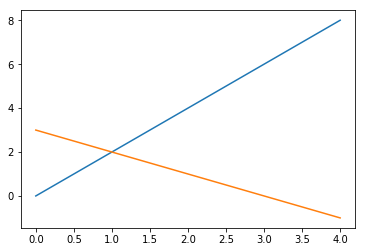

[[1. 2.]]


In [71]:
from numpy.linalg import inv

def a(x):
    for i in range(x):
        yield 2*i

def b(x):
    for i in range(x):
        yield -i+3

test = 5
plt.plot(range(test), list(a(test)))
plt.plot(range(test), list(b(test)))
plt.show()

c = np.mat(((-2,1),(1,1)))
d = np.mat((0,3))
e = inv(c)
print(d*e)

__Oefening 5__ Lineaire transformaties en random punten
De $numpy.random$ module voorziet in het genereren van random waarden (voor verschillende probabiliteitsdistributies, bvb de normale verdeling). Genereer een (10x2) matrix met 10 random x en 10 random y waarden volgens een normale verdeling in het interval $[0,1]$. Transformeer vervolgens deze 10 random coordinaten naar 10 nieuwe coordinaten via volgende lineaire transformatie :
\begin{equation*}
\bf{A} = 
\begin{bmatrix}
-1 & 0 \\
0 & 1
\end{bmatrix}
\end{equation*}
Bereken eerst de determinant van de matrix. (dit geeft je alvast informatie over het type transformatie.)
Plot de originele 10 random coördinaten (verbindt ze via een lijn) en doe hetzelfde met de getransformeerde coördinaten. 

__Oefening 6__: Kwadratische functies of parabolen

Kwadratische functies of parabolen kan je als volgt definiëren :
\begin{equation}
y = a (x - \alpha)^2 + \beta
\end{equation}

M.a.w. de parabool is volledig gedefinieerd als je de waarden $a, \alpha$ en $\beta$ kent. Van een parabool kan je de top (of het dal) berekenen, de nulpunten (dit zijn de snijpunten met de x-as, er zijn er 2,0 of geen) en de snijpunten met de y-as.  Dit doe je als volgt :

* de top bevindt zich op de coördinaten : $(\alpha,\beta)$

* de nulpunten hebben als coördinaten : $((- of +) \sqrt(\frac{- \beta}{a}) + \alpha, 0)$

* snypunt met de y-as : $(0, a\alpha^2 + \beta)$

1.a. Schrijf nu zelf een Python-functie $kenmerken\_parabool(a, alpha, beta)$ die 3 resultaten teruggeeft : de top, de nulpunten en het snijpunt van de y-as

1.b Schrijf een functie $waardentabel\_parabool(a, alpha,beta)$ die een 2dim array berekent met in de eerste rij de x-waarden en als tweede rij de y-waarden van de parabool. De middenste waarde van de tabel is de top, neem nog 3 x-waarden kleiner en 3 x-waarden groter dan de top mee op in de waardentabel. In totaal heb je dus een 2dim array van 7 op 2.

1.c Schrijf een functie $parabool(a,alpha,beta)$ die gebruik makende van de waardentabel bepaald in vorige functie een plot maakt van de parabool. 
Plaats de vergelijking zelf in de grafiektitel.

Test je methodes uit met volgende parabolen : 
* $y = 2(x - 1)^2 - 12$
* $y = -4(x - 1)^2 + 4$
